In [2]:
import pandas as pd
import json

In [217]:
data = pd.read_json('computers_train_xl_normal.json' , lines=True)

In [118]:
test_set = pd.read_json('task1_testset_1500_with_labels.json' , lines=True)

### VIEW WHAT THE DATA LOOK LIKE

In [111]:
data.head()

,cluster_id_left,cluster_id_right,label,prod_left_right
1,1679624,1679624,1,hp enterprise description intel xeon x5560 ml3...
9,109916,109916,1,asus support for x series intel core processor...
18,4703255,4703255,1,hp enterprise description intel xeon processor...
19,4682367,4682367,1,fujitsu description fujitsu 146gb ultra320 3 5...
24,1060754,1060754,1,amd amd a6 5400k dual core apu processor 3 6gh...


In [110]:
test_set.head()

,id_left,cluster_id_left,category_left,title_left,description_left,brand_left,price_left,keyValuePairs_left,specTableContent_left,id_right,...,category_right,title_right,description_right,brand_right,price_right,keyValuePairs_right,specTableContent_right,label,pair_id,sampling
0,4210789,533129,Computers_and_Accessories,"""Intel X520-DA2 PCI Express 2.0 Network Adapt...","""Intel's family of adapter, the Intel' Etherne...",None,"""$"", ""333.16""",None,None,6428629,...,Computers_and_Accessories,"""Intel X520-DA2 Dual Port Gigabit SFP Etherne...","""2 Port Intel E10G42BTDA 10 Gigabit SFP Ethern...",None,None,None,None,1,4210789#6428629,high similarity with old products
1,8813989,55385,Computers_and_Accessories,"""Zotac GeForce GTX 1070Ti AMP Extreme 8192MB ...","""ZT-P10710B-10P, Core Clock: 1607MHz, Boost Cl...","""Zotac""@en",None,None,None,4435647,...,Computers_and_Accessories,"""Zotac NVIDIA GeForce GTX 1070 Ti 8GB AMP! Ex...","""Zotac GeForce GTX 1070 Ti AMP! Extreme Editio...",None,None,None,None,1,8813989#4435647,high similarity with old products
2,4132226,69927,Computers_and_Accessories,"""TP-LINK TL-WPS510U 150Mbps Wireless Print Se...","""TP-Link 54Mbps Pocket-Sized Wireless Print Se...","""TP-Link""@en-US",None,None,None,2095262,...,Computers_and_Accessories,"""TP-LINK TL-WPS510U - print server"" "" TP-LINK...","""Print servers give businesses the ability to ...",None,"""$"", ""71.81""",None,None,1,4132226#2095262,high similarity with old products
3,12056462,1380893,Computers_and_Accessories,"""Logitech - MK550 Wireless Wave Keyboard and ...","""Logitech MK550 Wireless Wave Keyboard and Mou...",None,None,None,None,11152603,...,Computers_and_Accessories,"""Logitech MK550 Wireless Wave Keyboard and Mo...","""The Logitech MK550 Wireless Wave Keyboard and...","""Logitech""@en-US",None,None,None,1,12056462#11152603,high similarity with old products
4,8636740,104025,Computers_and_Accessories,"""Western Digital - Blue 500GB 2.5"" Solid Stat...",None,"""Western Digital""",None,None,None,16302898,...,Computers_and_Accessories,"""Buy Online | WD Blue PC SSD 500GB SATA III 2...","""\n\tWD Blue PC SSD 500GB SATA III 2.5″ WDS500...",None,None,None,Weight 0.1 kg Brand Western Digital Model WDS...,1,8636740#16302898,high similarity with old products


In [ ]:
### VIEW 

In [6]:
print("Are there any null values?")
print(data.isnull().values.any() , "\n")
#Find out how many - This gives you the breakdown per column
print('How many null values are in each column?'),
print(data.isnull().sum(), "\n")
#Get total overall null values
print('How many null values are in the data in total?')
print(data.isnull().sum().sum())

Are there any null values?
True 

How many null values are in each column?
id_left                       0
title_left                    0
description_left          21875
brand_left                34993
price_left                57085
specTableContent_left     47564
keyValuePairs_left        49696
category_left                 0
cluster_id_left               0
identifiers_left              0
id_right                      0
title_right                   0
description_right         20821
brand_right               35393
price_right               57114
specTableContent_right    46304
keyValuePairs_right       48186
category_right                0
cluster_id_right              0
identifiers_right             0
label                         0
pair_id                       0
dtype: int64 

How many null values are in the data in total?
419031


- For this analysis, I would like to use the three columns for the product matching.
- First, title only
- Second, title and brand
- Third, title , brand and description

### Function to generate data any of the three categories above

In [218]:
def generate_data(df):
    ans= int(input('What type of data do you want to generate? \nEnter 1 for title only \nEnter 2 for title and brand \nEnter 3 for title , brand and description\nThen press Enter'))
    if ans==1:
        df['prod_left_right']= df['title_left'] +" " + df['title_right']
    elif ans==2:
        df['prod_left_right']= df['title_left'] +" " + df['brand_left'] +" " + df['title_right'] +" " +df['brand_right'] 
    elif ans==3:
        df['prod_left_right']= df['title_left'] + " " + df['brand_left'] + " " +df['description_left'] +" " + df['title_right'] + " " + df['brand_right'] + " " +df['description_right']
    elif ans<1 or ans > 3:
        generate_data(df)
    new_data= df
    return new_data
new_data= generate_data(data)

What type of data do you want to generate? 
Enter 1 for title only 
Enter 2 for title and brand 
Enter 3 for title , brand and description
Then press Enter1


In [219]:
new_data.head()

,id_left,title_left,description_left,brand_left,price_left,specTableContent_left,keyValuePairs_left,category_left,cluster_id_left,identifiers_left,...,brand_right,price_right,specTableContent_right,keyValuePairs_right,category_right,cluster_id_right,identifiers_right,label,pair_id,prod_left_right
0,5490217,hp intel xeon x5560 prijzen tweakers,None,None,None,categorie processors merk hp product hp intel ...,"{'categorie': 'processors', 'merk': 'hp', 'pro...",Computers_and_Accessories,1679624,"[{'/mpn': '[495906b21]'}, {'/gtin13': '[884420...",...,hp enterprise,usd 213 85,specifications category proliant processor sub...,"{'category': 'proliant processor', 'sub catego...",Computers_and_Accessories,1679624,[{'/mpn': '[495906b21]'}],1,5490217#16248399,"hp intel xeon x5560 prijzen tweakers null , 49..."
1,16876009,"495906 b21 hp x5560 2 80ghz ml350 g6 , null ne...",description intel xeon x5560 ml350 g6 2 80ghz ...,hp enterprise,None,specifications category proliant processor sub...,"{'category': 'proliant processor', 'sub catego...",Computers_and_Accessories,1679624,"[{'/sku': '[495906b21]'}, {'/mpn': '[495906b21...",...,hp enterprise,usd 213 85,specifications category proliant processor sub...,"{'category': 'proliant processor', 'sub catego...",Computers_and_Accessories,1679624,[{'/mpn': '[495906b21]'}],1,16876009#16248399,"495906 b21 hp x5560 2 80ghz ml350 g6 , null ne..."
2,16543750,asus motherboard lga2066 ddr4 m 2 u atx 2xgbe ...,None,None,None,None,None,Computers_and_Accessories,109916,"[{'/sku': '[34181655]'}, {'/mpn': '[primex299d...",...,None,None,None,None,Computers_and_Accessories,109916,[{'/productID': '[90mb0ty0m0eay0]'}],1,16543750#14031864,asus motherboard lga2066 ddr4 m 2 u atx 2xgbe ...
3,16721450,asus prime x299 deluxe prijzen tweakers,None,None,None,categorie moederborden merk asus product asus ...,"{'categorie': 'moederborden', 'merk': 'asus', ...",Computers_and_Accessories,109916,"[{'/mpn': '[primex299deluxe, 90mb0ty0m0eay0]'...",...,asus,None,None,None,Computers_and_Accessories,109916,"[{'/mpn': '[90mb0ty0m0eay0]'}, {'/gtin13': '[4...",1,16721450#10358026,asus prime x299 deluxe prijzen tweakers asus p...
4,14031864,asus prime x299 deluxe,placa base atx socket lga2066 chipset intel x2...,None,None,None,None,Computers_and_Accessories,109916,[{'/productID': '[90mb0ty0m0eay0]'}],...,asus,None,None,None,Computers_and_Accessories,109916,"[{'/productID': '[asux29del]'}, {'/mpn': '[pri...",1,14031864#4588573,asus prime x299 deluxe asus prime x299 deluxe ...


In [174]:
def extract_features(df,field,training_data,testing_data,type=""):
    """Extract features """
    
    logging.info("Extracting features and creating vocabulary...")
    
        
    # TF-IDF BASED FEATURE REPRESENTATION
    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
    tfidf_vectorizer.fit_transform(training_data[field].values)
        
    train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
    test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
    return train_feature_set,test_feature_set,tfidf_vectorizer

<class 'pandas.core.series.Series'>


0        1
1        1
2        1
3        1
4        1
        ..
68456    0
68457    0
68458    0
68459    0
68460    0
Name: label, Length: 68461, dtype: int64

### Drop missing data

In [220]:
new_data=new_data.dropna()
test= test.dropna()

In [221]:
new_data.head()

,id_left,title_left,description_left,brand_left,price_left,specTableContent_left,keyValuePairs_left,category_left,cluster_id_left,identifiers_left,...,brand_right,price_right,specTableContent_right,keyValuePairs_right,category_right,cluster_id_right,identifiers_right,label,pair_id,prod_left_right
244,16438005,"242469 001 hp storageworks external , null",description storageworks external tapepart num...,hp enterprise,149 35 usd,specifications category proliant sub category ...,"{'category': 'proliant', 'sub category': 'tape...",Computers_and_Accessories,15504953,[{'/mpn': '[242469001]'}],...,hp enterprise,149 35 usd,specifications category proliant sub category ...,"{'category': 'proliant', 'sub category': 'tape...",Computers_and_Accessories,15504953,[{'/mpn': '[242469001]'}],1,16438005#17205507,"242469 001 hp storageworks external , null nul..."
510,17227264,"238921 b21 hp 72 8 gb 10k fc al hdd , null",description storageworks 72 8gb 10k fibre chan...,hp enterprise,111 74 cad cad,specifications category storageworks hdd sub c...,"{'category': 'storageworks hdd', 'sub category...",Computers_and_Accessories,650894,[{'/mpn': '[238921b21]'}],...,hp enterprise,789 95 cad cad,specifications category storageworks hdd sub c...,"{'category': 'storageworks hdd', 'sub category...",Computers_and_Accessories,650894,[{'/mpn': '[238921b21]'}],1,17227264#15910101,"238921 b21 hp 72 8 gb 10k fc al hdd , null 238..."
584,12160995,430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...,description 10 x 146gb 2 5 inch serial attache...,hp enterprise,cad,specifications manufacturer hp category hard d...,"{'manufacturer': 'hewlett packard', 'category'...",Computers_and_Accessories,152802,"[{'/productID': '[455127hp]'}, {'/sku': '[hp43...",...,hp enterprise,75 95 usd,specifications manufacturer hp category hard d...,"{'manufacturer': 'hewlett packard', 'category'...",Computers_and_Accessories,152802,[{'/mpn': '[hp430165003]'}],1,12160995#14688594,430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...
585,11238231,430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack,description 10 x 146gb 2 5 inch serial attache...,hp enterprise,757 67 cad,specifications manufacturer hp category hard d...,"{'manufacturer': 'hewlett packard', 'category'...",Computers_and_Accessories,152802,[{'/mpn': '[hp430165003]'}],...,hp enterprise,75 95 usd,specifications manufacturer hp category hard d...,"{'manufacturer': 'hewlett packard', 'category'...",Computers_and_Accessories,152802,[{'/mpn': '[hp430165003]'}],1,11238231#14688594,430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...
588,12160995,430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...,description 10 x 146gb 2 5 inch serial attache...,hp enterprise,cad,specifications manufacturer hp category hard d...,"{'manufacturer': 'hewlett packard', 'category'...",Computers_and_Accessories,152802,"[{'/productID': '[455127hp]'}, {'/sku': '[hp43...",...,hp enterprise,133 20 usd,specifications manufacturer hp category hard d...,"{'manufacturer': 'hewlett packard', 'category'...",Computers_and_Accessories,152802,[{'/mpn': '[hp430165003]'}],1,12160995#9512726,430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...


In [70]:
test.prod_left_right.head()

5     "ARRIS"@en-US "8X Faster than DOCSIS 2.0 Downl...
9     "LOGITECH" "OverviewLOGITECH ADVANCED 2.4 GHZ ...
10    "HP Enterprise" "Description:Genuine HPE 4GB (...
12    "Transcend" "Transcend 16GB SDHC10 Secure Digi...
21    "Patriot"@en-US "The Patriot LX Class 10 Micro...
Name: prod_left_right, dtype: object

#### View some data parameters

In [222]:
data.label.value_counts(normalize=True)

0    0.85846
1    0.14154
Name: label, dtype: float64

#### Plot the labels 0 for non matching 1 for matching

<AxesSubplot:>

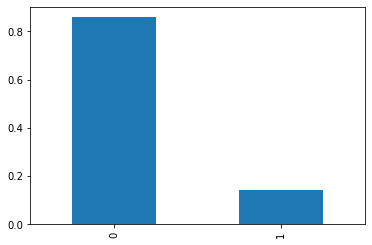

In [223]:
data.label.value_counts(normalize=True).sort_index().plot(kind='bar')

## LEARN THE VOCABULARY

In [226]:
import nltk
from nltk.tokenize import word_tokenize #to tokenize the column
from nltk.stem.snowball import SnowballStemmer # To stem the each word
stemmer= SnowballStemmer(language='english')

#defining the function to remove punctuation
import re
import string
string.punctuation
#library that contains punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

print('===applying the function remove_punctuation to column "prod_left_right" in new_data set===\n\n')
new_data['prod_left_right'] = new_data['prod_left_right'].apply(lambda x:remove_punctuation(x))
print('===Function remove_punctuation applied to column "prod_left_right" in new_data set===\n\n')

print('===Generating Stopwords===...')
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')
print('Creating a Tf-Idf instance')
print('Learning the vocabulary and pass in the text it needs to fit')
vectorizer.fit(new_data.prod_left_right)
print('\n\n')
print('The length of the vocabulary learnt is', len(vectorizer.vocabulary_))


print('Transform Training and test data')
inputs= vectorizer.transform(new_data.prod_left_right)


===applying the function remove_punctuation to column "prod_left_right" in new_data set===
===Function remove_punctuation applied to column "prod_left_right" in new_data set===
===Generating Stopwords===...


C:\Users\pc\AppData\Local\Temp/ipykernel_14244/2456849028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['prod_left_right'] = new_data['prod_left_right'].apply(lambda x:remove_punctuation(x))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Creating a Tf-Idf instance
Learning the vocabulary and pass in the text it needs to fit


The length of the vocabulary learnt is 503


In [18]:
word_tokenize('This is a man')

['This', 'is', 'a', 'man']

In [225]:
new_data.prod_left_right.head()

244    242469 001 hp storageworks external  null null...
510    238921 b21 hp 72 8 gb 10k fc al hdd  null 2389...
584    430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...
585    430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...
588    430165 003 hp 146 gb 3g 10k 2 5 dp sas 10 pack...
Name: prod_left_right, dtype: object

In [20]:
stemmer.stem('praying')

'pray'

#### Function To Remove punctuations

In [65]:
import re
import string
string.punctuation

''' def tokenize(url:str):   
    url=re.sub("(\W|_)+"," ",url)
    return url 
'''
#library that contains punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#### apply the function remove_punctuation to all columns for train data set

In [66]:
data['prod_left_right'] = data['prod_left_right'].apply(lambda x:remove_punctuation(x))
test['prod_left_right'] = test['prod_left_right'].apply(lambda x:remove_punctuation(x))

In [71]:
test['prod_left_right'] = test['prod_left_right'].apply(lambda x:remove_punctuation(x))

### Define Tokenizer function

In [67]:
def tokenize(text):
            return [stemmer.stem(token) for token in word_tokenize(text)]

#### Generate Stopwords

In [24]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')

#### Create a Tf-Idf instance

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize , 
                             stop_words=english_stopwords,
                            ngram_range=(1,1) #, max_features=2000
                            )

#### Learn the vocabulary and pass in the text it needs to fit

In [69]:
vectorizer.fit(data.prod_left_right)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x000001CAAC161AF0>)

#### View the first 200 features of the first row

In [237]:
vectorizer.get_feature_names()[-200:]

['bl680c',
 'bl685c',
 'blade',
 'board',
 'box',
 'bus',
 'chassi',
 'consol',
 'control',
 'cooler',
 'core',
 'cpu',
 'ddr',
 'desktop',
 'dg0146famwl',
 'dg0300bahzq',
 'dg0300farvv',
 'dh0072balwl',
 'dimm',
 'dl120',
 'dl140',
 'dl145',
 'dl160',
 'dl165',
 'dl170h',
 'dl320',
 'dl360',
 'dl360p',
 'dl360r',
 'dl380',
 'dl560',
 'dl580',
 'dl580r',
 'dl740r',
 'dl760',
 'dlt',
 'dp',
 'drive',
 'dual',
 'dvd',
 'e',
 'e5',
 'e5335',
 'e5345',
 'e5410',
 'e5504',
 'e5506',
 'e5507',
 'e5607',
 'e7400',
 'e7440',
 'e74820',
 'e74830',
 'e78867',
 'ec',
 'ecc',
 'eg0146fartr',
 'eh0146fawjb',
 'el',
 'enclosur',
 'eql',
 'ethernet',
 'ext',
 'extern',
 'fan',
 'fc',
 'flexfabr',
 'fujitsu',
 'g',
 'g2',
 'g3',
 'g4p',
 'g5',
 'g6',
 'g7',
 'g8',
 'g9',
 'gb',
 'hba',
 'hca',
 'hd00931c35',
 'hdd',
 'host',
 'hp',
 'hplug',
 'hz',
 'i5',
 'insight',
 'int',
 'intel',
 'interfac',
 'intern',
 'kit',
 'kvm',
 'l5335',
 'le',
 'librari',
 'lp',
 'may2073rc',
 'mb',
 'mdl',
 'memori',
 '

In [1]:
tokenize('Computers_and_Accessories hp enterpris')

NameError: name 'tokenize' is not defined

#### Transform Training and test data

In [47]:
inputs= vectorizer.transform(data.prod_left_right)

In [48]:
inputs.shape

(14238, 10225)

In [50]:
inputs.toarray()[1]

array([0.06926941, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

#### Transform test data

In [72]:
test_inputs= vectorizer.transform(test.prod_left_right)

In [73]:
test_inputs.shape

(587, 9196)

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#### Split the data into train and validation 

In [74]:
from sklearn.model_selection import train_test_split

In [81]:
X_train , X_test , y_train , y_test = train_test_split(inputs , data.label , test_size= 0.3 , random_state=42)

In [84]:
X_train

<9966x10225 sparse matrix of type '<class 'numpy.float64'>'
	with 653042 stored elements in Compressed Sparse Row format>

In [88]:
y_test.tail()

62087    0
60275    0
36015    0
26869    0
47345    0
Name: label, dtype: int64

#### Validation data

In [90]:
X_train , X_test , y_train , y_test = train_test_split(test_inputs , test.label , test_size= 0.3 , random_state=42)

In [93]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [94]:
#predicted y
y_pred = naive_bayes_classifier.predict(X_test)

In [99]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=['nonmatch', 'match']))

              precision    recall  f1-score   support

    nonmatch       0.78      1.00      0.88       137
       match       1.00      0.03      0.05        40

    accuracy                           0.78       177
   macro avg       0.89      0.51      0.46       177
weighted avg       0.83      0.78      0.69       177



In [100]:
from sklearn.linear_model import LogisticRegression

In [106]:
log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=log_reg.fit(X_train,y_train)

[LibLinear]

In [107]:
#predicted y
y_pred = model.predict(X_test)

In [108]:
print(metrics.classification_report(y_test, y_pred, target_names=['nonmatch', 'match']))

              precision    recall  f1-score   support

    nonmatch       0.80      0.95      0.87       137
       match       0.50      0.17      0.26        40

    accuracy                           0.77       177
   macro avg       0.65      0.56      0.56       177
weighted avg       0.73      0.77      0.73       177

